In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt

# Data Generation

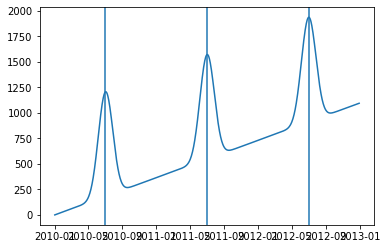

In [2]:
period = 365
b = 2*np.pi / period # multiplier to change period 

# create time series data
days = np.arange(0,365*3)
values = (1 + np.cos(np.pi + days * b))**10 + np.array(range(len(days)))
dates = np.array([dt.date(2010,1,1) + dt.timedelta(days = int(x)) for x in days])
plt.plot(dates, values)

for year in range(2010,dates.max().year + 1):
    mid = dt.date(year,1,1) + dt.timedelta(days = 182)
    plt.axvline(mid)

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = plt.axes(projection = 'polar')
#ax.axis('off')


period = 365 # doesn't account for leap years
b = 2*np.pi / period # multiplier to change period 

angles = np.array( [-np.pi/2 + math.radians(((u % 365) *(365/360))) for u in days])
radii = np.linspace(1, 50, len(angles))

width = values / 300 # width of spiral
n = len(angles)

# create a color map

base_color = (1,1,0)
end_color = (1,.15,0)


def frac(value, data = values):
    val = (value - np.min(data)) / (np.max(data) - np.min(data))
    return val
    
ax.plot(-angles, (radii), color = 'red')

for key, day in enumerate(days):

    date = dt.date(2010,1,1) + dt.timedelta(days = key)
    if date.day == 1: # mark new months
      ax.plot((-angles[key], -angles[key]), (radii[key]-.4, radii[key]), color = 'black')

    try:
    
        value = values[key]
        t = frac(value)
        r = (1-t)*base_color[0] + t*end_color[0]
        g = (1-t)*base_color[1] + t*end_color[1]
        b = (1-t)*base_color[2] + t*end_color[2]
        
        color = r,g,b

        ax.fill_between(-angles[key:key+2], (radii)[key:key+2], (radii + width)[key:key+2],
                       color = color) #, edgecolor = .5*np.array([1,1,1]) + .5*np.array(color))
    except IndexError:
        pass
     
ax.set_rticks([]) # radius ticks
plt.savefig("spiral_chart1.png", dpi = 500)